In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from IPython.display import Image
import warnings
warnings.simplefilter('ignore')
import seaborn
from sklearn import metrics
from timeit import default_timer as timer
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.varmax import VARMAX

# VAR - векторная авторегрессия

$$Y_t = c + \Phi_1 Y_{t-1} + \Phi_2 Y_{t-2} + \cdots \Phi_p Y_{t-p} + \Epsilon_t$$ 
- уравнение векторной авторегрессии порядка p

In [ ]:
Image(filename='0.png')

In [ ]:
Image(filename='1.png')

## Предположения, лежащие в основе модели VAR

Анализ VAR зависит от нескольких предположений и требований для обеспечения достоверности и надежности результатов:


* Линейность: Отношения между переменными линейны.
* Стационарность: данные временных рядов стационарны.
* Нет идеальной мультиколлинеарности: между переменными не существует совершенных линейных отношений.
* Нет автокорреляции в остатках
* Гомосдедастичность: Остаточная дисперсия постоянна.
* Нет эндогенности: на переменные не влияют опущенные факторы.
* Экзогенность: На объяснительные переменные не влияют другие переменные.
* Достаточные наблюдения: адекватные данные для оценки параметров.
* Слабая экзогенность: некоторые переменные могут быть эндогенными, но не одновременно коррелировать с ошибками.

### Тест причинности Грейнджера

Основой векторной авторегрессии является то, что каждый из временных рядов в системе влияет друг на друга. То есть вы можете предсказать ряд с прошлыми значениями самого себя вместе с другими рядами в системе.

Используя тест причинности Грейнджера, можно проверить эту связь еще до построения модели.

Причинность Грейнджера проверяет нулевую гипотезу о том, что коэффициенты прошлых значений в уравнении регрессии равны нулю.

Таким образом, если p-значение, полученное в результате теста, меньше уровня значимости 0,05, то вы можете смело отвергнуть нулевую гипотезу.

### Тест на коинтеграцию

Тест на коинтеграцию помогает установить наличие статистически значимой связи между двумя или более временными рядами.

**Порядок интеграции (d)** — это не что иное, как количество разностей, необходимых для того, чтобы сделать нестационарный временной ряд стационарным.

Теперь, когда у вас есть два или более временных ряда, и существует их линейная комбинация, которая имеет порядок интеграции (d) меньше, чем у отдельного ряда, то **совокупность рядов называется коинтегрированной.**


Когда два или более временных ряда коинтегрированы, это означает, что они имеют долгосрочную статистически значимую связь.

Это основная предпосылка, на которой основаны модели векторной авторегрессии (VAR). Поэтому довольно часто перед началом построения моделей VAR реализуют тест на коинтеграцию.


**Определение 1.**

Пусть $𝑥_𝑡$- однородно нестационарный временной ряд. Будем говорить, что $𝑥_𝑡$ принадлежит классу 𝐼(1), если его разности
$Δ𝑥_𝑡=𝑥_𝑡−𝑥_{𝑡−1}$ является стационарным (принадлежит классу 𝐼(0)).

**Определение 2**

Пусть $𝑥_𝑡$- однородно нестационарный временной ряд. Будем говорить, что $𝑥_𝑡$ принадлежит классу 𝐼(𝑑), если его разности
$Δ𝑥_𝑡=𝑥_𝑡−𝑥_{𝑡−1}$ является рядом из класса 𝐼(𝑑−1). 

Пусть $𝑦_𝑡 −$ 𝑛-мерный временной ряд
такой, что каждая из его компонент $𝑦_𝑘,𝑡𝑘=1,...,𝑛$ взятая в отдельности представляет собой ряд из класса 𝐼(1).

**Определение 3.**

Компоненты этого ряда называют коинтегрированными, если существует их нетривиальная линейная комбинация $𝑎^{T}𝑦_𝑡$, которая является стационарной (принадлежит классу 𝐼(0)).

### Проверка последовательной корреляции остатков (ошибок) с использованием статистики Дарбина-Уотсона

Последовательная корреляция остатков используется для проверки наличия какой-либо остаточной закономерности в остатках (ошибках).

Если в остатках осталась какая-либо корреляция, то во временном ряду есть некоторая закономерность, которую еще предстоит объяснить с помощью модели. В этом случае типичные действия — либо увеличить порядок модели, либо ввести больше предикторов в систему, либо найти другую модель для временного ряда.

Таким образом, проверка последовательной корреляции заключается в том, чтобы убедиться, что модель в достаточной степени способна объяснить дисперсии и закономерности во временном ряду.

Обычный способ проверки последовательной корреляции ошибок можно измерить с помощью статистики Дарбина-Уотсона.

Значение этой статистики может варьироваться от 0 до 4. Чем ближе оно к значению 2, тем нет значимой последовательной корреляции. Чем ближе к 0, тем есть положительная последовательная корреляция, а чем ближе к 4, тем отрицательная последовательная корреляция.

### VARMA

$$y_t = \nu + A_1 y_{t-1} + \dots + A_p y_{t-p} + B x_t + \epsilon_t + M_1 \epsilon_{t-1} + \dots M_q \epsilon_{t-q}$$

In [ ]:
seaborn.set_style('darkgrid')
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

In [ ]:
from arch.data import crude
import numpy as np
data = crude.load()
log_price = np.log(data)

ax = log_price.plot()
xl = ax.set_xlim(log_price.index.min(), log_price.index.max())
plt.show()

In [ ]:
from arch.unitroot import ADF

ADF(log_price.WTI, trend="c")

In [ ]:
ADF(log_price.Brent, trend="c")

In [ ]:
from arch.unitroot import engle_granger

eg_test = engle_granger(log_price.WTI, log_price.Brent, trend="n")
eg_test

In [ ]:
fig = eg_test.plot()
plt.show()

In [ ]:
eg_test.cointegrating_vector

Оценка показывает, что есть коинтегрированность, так как близок к [1,−1]

In [ ]:
eg_test = engle_granger(log_price.WTI, log_price.Brent, trend="ct")
eg_test

In [ ]:
eg_test.cointegrating_vector

Остатки в целом около нуля, но есть намеки на кризис 2008

In [ ]:
fig = eg_test.plot()
plt.show()

Посмотрим на докризисном периоде

In [ ]:
eg_test = engle_granger(log_price[:"2008"].WTI, log_price[:"2008"].Brent, trend="n")
eg_test

In [ ]:
fig = eg_test.plot()
ax = fig.get_axes()[0]
title = ax.set_title("Pre-2009 Cointegration Residual")
plt.show()

## Phillips-Ouliaris

Тесты Филлипса-Оуэлрса состоят из четырех различных тестов. Два из них похожи на тест Грейнджера, только с использованием подхода, подобного подходу Phillips & Perron, заменяющего лаги в тесте ADF на оценку долгосрочной дисперсии. Два других используют подходы, подобные дисперсионному отношению, для тестирования. В обоих случаях тест стабилизируется, когда нет коинтеграции, и расходится из-за сингулярности ковариационной матрицы временного ряда I(1), когда есть коинтеграция.

$𝑍_𝑡$ - Как PP, с использованием t-статистики коэффициента AR(1) в AR(1) остатка из поперечной регрессии.

$𝑍_𝛼$ - Как PP, использующий 𝑇(𝛼−1) и смещение из того же AR(1)

$𝑃_𝑢$ - Тест одномерного дисперсионного отношения.

$𝑃_𝑧$ - Тест многомерного дисперсионного отношения.

Все четыре тестовые статистики согласуются с данными по сырой нефти.

Тестовые статистики $𝑍_𝑡$ и $𝑍_𝛼$ основаны на количестве $𝛾=𝜌−1$ из регрессии $𝑦_𝑡=𝑑_𝑡Δ+𝜌𝑦_{𝑡−1}+𝜖_𝑡$. 

Основная гипотеза отклоняется в пользу альтернативы, когда $𝛾<0$, так как тестовая статистика ниже своего критического значения.

In [ ]:
from arch.unitroot.cointegration import phillips_ouliaris

po_zt_test = phillips_ouliaris(log_price.WTI, log_price.Brent, trend="c", test_type="Zt")
po_zt_test.summary()

In [ ]:
po_za_test = phillips_ouliaris(log_price.WTI, log_price.Brent, trend="c", test_type="Za")
po_za_test.summary()

The 𝑃𝑢 and 𝑃𝑧 statistics are variance ratios where under the null the numerator and denominator are balanced and so converge at the same rate. Under the alternative the denominstor convreges to zero and the statistic diverges, so that rejection of the null occcurs when the test statistic is above a critical value.

In [ ]:
po_pu_test = phillips_ouliaris(log_price.WTI, log_price.Brent, trend="c", test_type="Pu")
po_pu_test.summary()

In [ ]:
po_pu_test = phillips_ouliaris(log_price.WTI, log_price.Brent, trend="c", test_type="Pz")
po_pu_test.summary()

Коинтегрированные остатки идентичны тем, что были на первом шаге в тесте Грейнджера

In [ ]:
fig = po_zt_test.plot()
plt.show()

## Различные векторные модели для DowJones

In [ ]:
df = pd.read_csv(r'Dow_Jones_Industrial_Average.csv', parse_dates= True)
df = df[(df['Date'] > '2016-01-14') & (df['Date'] <= '2017-01-30')]
df

In [ ]:
for c in df[['Open', 'High', 'Low', 'Close']]:
    df[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of Facebook stocks before stationary")
    plt.show()

In [ ]:
for c in df[['Open', 'High', 'Low', 'Close']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram before stationary")
    df[str(c)].hist()
    plt.subplot(212)
    df[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator before stationary")
    plt.show()

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return 

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
for column in ['Open', 'High', 'Low', 'Close']:
    Augmented_Dickey_Fuller_Test_func(df[column],column)
    print('-'*50)

In [ ]:
X = df[['Open', 'High', 'Low', 'Close' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
for column in ['Open', 'High', 'Low', 'Close']:
    Augmented_Dickey_Fuller_Test_func(train_diff[column],column)
    print('-'*50)

In [ ]:
for c in train_diff[['Open', 'High', 'Low', 'Close']]:
    train_diff[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of Facebook stocks after stationary")
    plt.show()

In [ ]:
for c in train_diff[['Open', 'High', 'Low', 'Close']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram after stationary")
    train_diff[str(c)].hist()
    plt.subplot(212)
    train_diff[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator after stationary")
    plt.show()

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [ ]:
cointegration_test(train_diff[['Open', 'High', 'Low', 'Close']])

In [ ]:
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(train_diff)
    results = model.fit(i)
    print(f'Order : {i}, AIC:  {results.aic}, BIC: { results.bic}')

In [ ]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [ ]:
results = model.fit(4)
display(results.summary())
z = results.forecast(y=train_diff[['Open', 'High', 'Low', 'Close' ]].values, steps=30)
df_pred = pd.DataFrame(z, columns=['Open', 'High', 'Low', 'Close'  ])

In [ ]:
df_pred["new_index"] = range(233, 263)
df_pred = df_pred.set_index("new_index")
df_pred

In [ ]:
res = inverse_diff(df[['Open', 'High', 'Low', 'Close' ]],df_pred)
res1 = res

In [ ]:
for i in ['Open', 'High', 'Low', 'Close' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

In [ ]:
for i in ['Open', 'High', 'Low', 'Close' ]:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

### VARMA

$$y_t = \nu + A_1 y_{t-1} + \dots + A_p y_{t-p} + B x_t + \epsilon_t + M_1 \epsilon_{t-1} + \dots M_q \epsilon_{t-q}$$

In [ ]:
X = df[['Open', 'High', 'Low', 'Close' ]]
train, test = X[0:-30], X[-30:]
train_diff = train.diff()
train_diff.dropna(inplace = True)
for column in['Open', 'High', 'Low', 'Close' ]:
    Augmented_Dickey_Fuller_Test_func(train_diff[column],column)
    print('-'*50)

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
cointegration_test(train_diff[['Open', 'High', 'Low', 'Close']])

In [ ]:
from pmdarima import auto_arima
pq = []
for column in['Open', 'High', 'Low', 'Close' ]:
    print(f'Searching order of p and q for : {column}')
    stepwise_model = auto_arima(train_diff[column],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{column} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

In [ ]:
pq

In [ ]:
df_results_moni = pd.DataFrame(columns=['p', 'q','RMSE Open','RMSE High','RMSE Low','RMSE Close'])
print('Grid Search Started')
start = timer()
for i in pq:
    if i[0]== 0 and i[2] ==0:
        pass
    else:
        print(f' Running for {i}')
        model = VARMAX(train_diff[[ 'Open', 'High', 'Low', 'Close'   ]], order=(i[0],i[2])).fit( disp=False)
        result = model.forecast(steps = 30)
        inv_res = inverse_diff(df[[ 'Open', 'High', 'Low', 'Close'   ]] , result)
        Opensrmse = np.sqrt(metrics.mean_squared_error(test['Open'], inv_res.Open_1st_inv_diff))
        Highrmse = np.sqrt(metrics.mean_squared_error(test['High'], inv_res.High_1st_inv_diff))
        Lowrmse = np.sqrt(metrics.mean_squared_error(test['Low'], inv_res.Low_1st_inv_diff))
        Closermse = np.sqrt(metrics.mean_squared_error(test['Close'], inv_res.Close_1st_inv_diff))
        df_results_moni.loc[len(df_results_moni)]= pd.Series({'p': i[0], 'q': i[2], 'RMSE Open':Opensrmse,'RMSE High':Highrmse,'RMSE Low':Lowrmse,'RMSE Close':Closermse })
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')

In [ ]:
df_results_moni.sort_values(by = ['RMSE Open','RMSE High','RMSE Low','RMSE Close'] )

In [ ]:
model = VARMAX(train_diff[[ 'Open', 'High', 'Low', 'Close' ]], order=(0,2)).fit( disp=False)
result = model.forecast(steps = 30)

In [ ]:
res2 = res1.merge(res, on = 'new_index', how = 'left')

In [ ]:
res1 = res1.reset_index(drop=True)
res1

In [ ]:
res = inverse_diff(df[['Open', 'High', 'Low', 'Close' ]],result)
res

In [ ]:
for i in ['Open', 'High', 'Low', 'Close' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

In [ ]:
res1

In [ ]:
train

In [ ]:
for i in ['Open', 'High', 'Low', 'Close' ]:
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot(train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.plot(res1[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

In [ ]:
for i in ['Open', 'High', 'Low', 'Close' ]:
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot(train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

### Ещё один пример с криптовалютой

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.000000e+00,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.000000e+00,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.000000e+00,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.000000e+00,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,bitcoin,BTC,Bitcoin,2018-11-25,1,3880.78,4120.87,3585.06,4009.97,6.825640e+09,6.974927e+10,0.7930,535.81
2038,bitcoin,BTC,Bitcoin,2018-11-26,1,4015.07,4107.14,3643.92,3779.13,6.476900e+09,6.573929e+10,0.2919,463.22
2039,bitcoin,BTC,Bitcoin,2018-11-27,1,3765.95,3862.96,3661.01,3820.72,5.998720e+09,6.646897e+10,0.7908,201.95
2040,bitcoin,BTC,Bitcoin,2018-11-28,1,3822.47,4385.90,3822.47,4257.42,7.280280e+09,7.407256e+10,0.7720,563.43


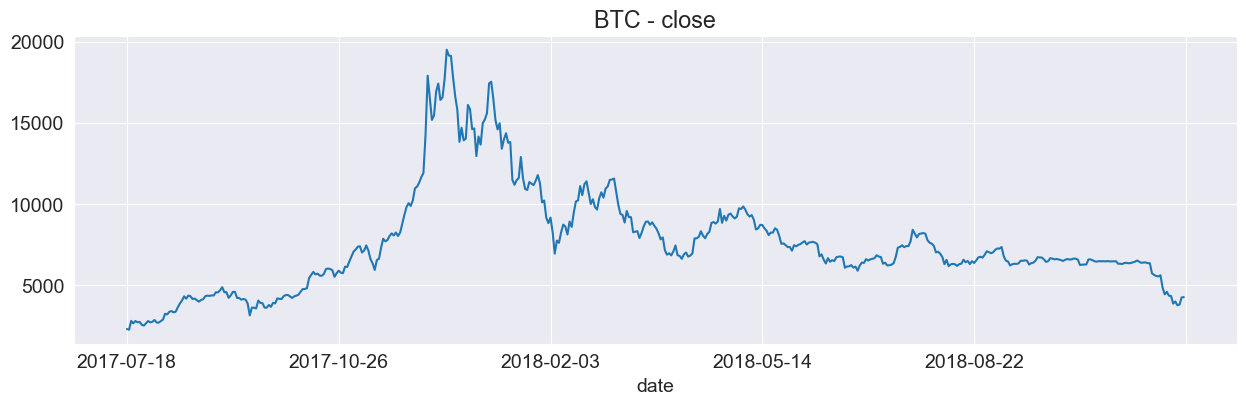

In [309]:
df = pd.read_csv('crypto-markets.csv')
df = df.loc[df.symbol == 'BTC']
df.set_index('date')['close'].tail(500).plot(figsize=(15,4), title='BTC - close')
df

In [310]:
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler

scaled_df = df.set_index('date')[['open','high','low','close']]

scaler = MaxAbsScaler()
scaler.fit(scaled_df)
scaled = scaler.transform(scaled_df)
scaled_df = pd.DataFrame(scaled_df, columns=scaled_df.columns)

# use first 1000 days as train
train = scaled_df[:1000]

# simulation window
window = 100 # days look ahead
test = scaled_df[1000:1000+window]

In [317]:
train

,open,high,low,close
date,,,,
2013-04-28,135.30,135.98,132.10,134.21
2013-04-29,134.44,147.49,134.00,144.54
2013-04-30,144.00,146.93,134.05,139.00
2013-05-01,139.00,139.89,107.72,116.99
2013-05-02,116.38,125.60,92.28,105.21
...,...,...,...,...
2016-01-18,381.73,388.10,376.67,387.17
2016-01-19,387.03,387.73,378.97,380.15
2016-01-20,379.74,425.27,376.60,420.23


In [318]:
test

,open,high,low,close
date,,,,
2016-01-23,382.43,394.54,381.98,387.49
2016-01-24,388.10,405.48,387.51,402.97
2016-01-25,402.32,402.32,388.55,391.73
2016-01-26,392.00,397.77,390.58,392.15
2016-01-27,392.44,396.84,391.78,394.97
...,...,...,...,...
2016-04-27,466.26,467.08,444.13,444.69
2016-04-28,445.04,449.55,436.65,449.01
2016-04-29,449.41,455.38,446.02,455.10


**VARMAX**

Вывод для каждого типа рядов

In [313]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX

data = train[['open','high','low','close']]

model = VARMAX(data, freq = 'D', order=(1,1), seasonal_order=(0, 0, 0, 0),
                mle_regression = True,
                filter_concentrated = True)
model_fit = model.fit(disp=True)


yhat = model_fit.predict(len(data), len(data))

from IPython.display import clear_output
clear_output()

model_fit.summary()

Dep. Variable:,"['open', 'high', 'low', 'close']",No. Observations:,1000
Model:,"VARMA(1,1)",Log Likelihood,-13897.617
,+ intercept,AIC,27889.234
Date:,"Mon, 24 Mar 2025",BIC,28119.899
Time:,15:36:16,HQIC,27976.903
Sample:,04-28-2013,Scale,0.983
,- 01-22-2016,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.79, 0.03, 0.12, 0.04",Jarque-Bera (JB):,"41009.13, 47767.21, 147467.55, 30455.02"
Prob(Q):,"0.37, 0.87, 0.73, 0.84",Prob(JB):,"0.00, 0.00, 0.00, 0.00"
Heteroskedasticity (H):,"0.27, 0.13, 0.06, 0.13",Skew:,"1.66, 3.72, -6.02, 0.80"


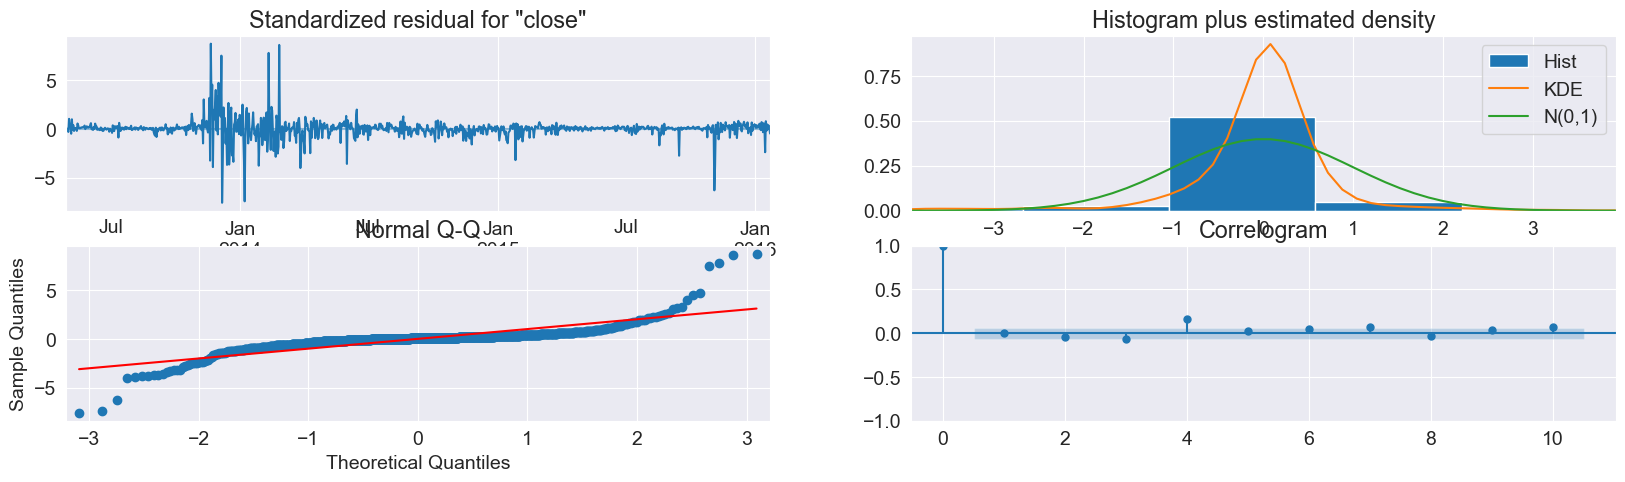

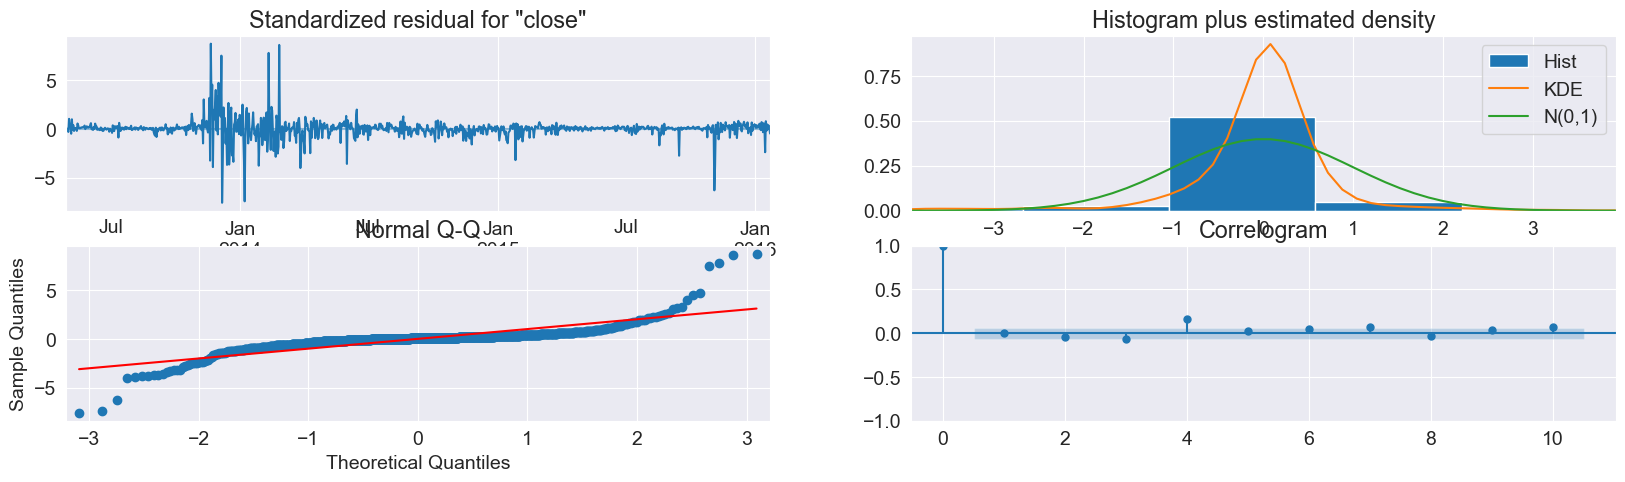

In [314]:
model_fit.plot_diagnostics(3,figsize=(20,5))

<Axes: title={'center': 'prediction vs observed'}>

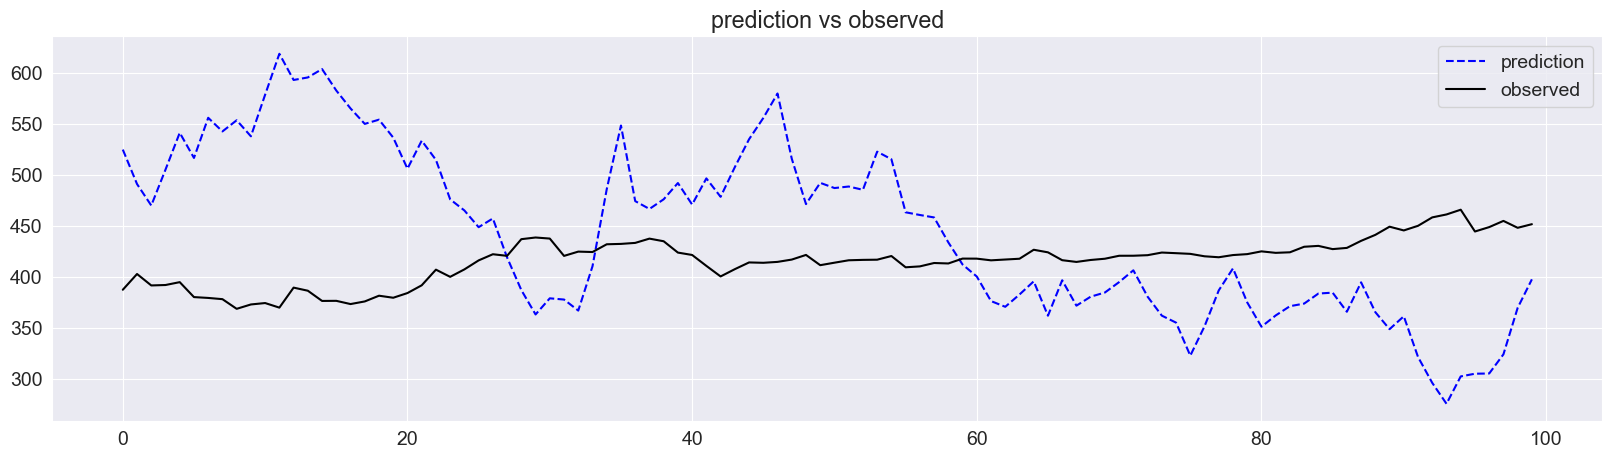

In [315]:
pred = pd.DataFrame()
pred['prediction'] = model_fit.simulate(window).reset_index(drop=True).close
pred['observed'] = test.reset_index(drop=True).close
pred.plot(figsize=(20,5),title='prediction vs observed',color=['blue','black'],style=['--','-'])

[]

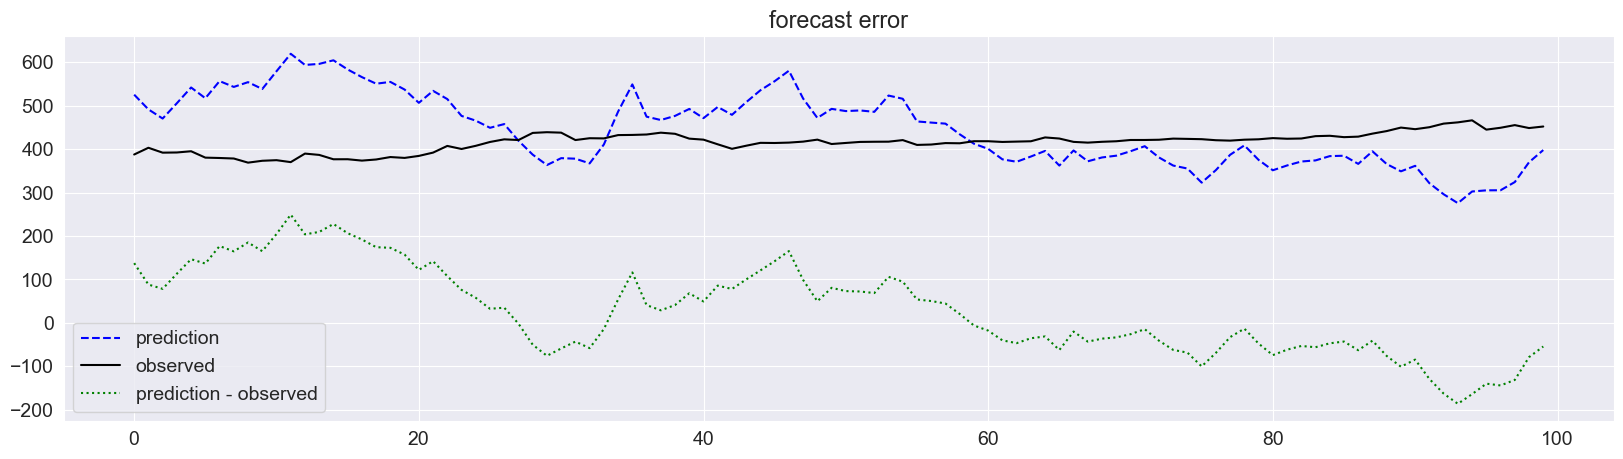

In [316]:
pred['prediction - observed'] = pred['prediction'] - pred['observed']
pred.plot(figsize=(20,5),title='forecast error',color=['blue','black','green'],style=['--','-',':'])
plt.plot()